In [13]:
import numpy as np
import pandas as pd
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

import catboost as cat
from catboost import CatBoostClassifier
import xgboost as xgb

In [2]:
%%time
edges = pd.read_csv('./edges.csv')
ids = pd.read_csv('./ids.csv')
vertices = pd.read_csv('./vertices.csv')

Wall time: 8.47 s


In [9]:
vertices

,id,main_okved,region_code,company_type
0,1,46.75,77,Limited
1,2,41.20,78,Limited
2,3,25.11,50,Limited
3,4,45.31,89,Limited
4,5,56.10,50,Limited
...,...,...,...,...
1534744,1534745,63.99,77,Individual
1534745,1534746,47.19,66,Individual
1534746,1534747,41.20,77,Individual
1534747,1534748,74.20,33,Individual


In [3]:
edges

,id_1,id_2,value,n_transactions
0,878327,1133997,478035.238733,277.747437
1,707356,1341541,442189.669684,80.997950
2,169982,494074,353097.929209,287.789650
3,551010,979933,537749.674840,426.743337
4,76064,597023,418990.198382,287.789650
...,...,...,...,...
4685639,533291,1134794,275822.479741,1.000000
4685640,929970,1378868,507684.088750,1.000000
4685641,45803,829031,318785.728608,1.000000
4685642,1266550,1448478,494106.825312,1.000000


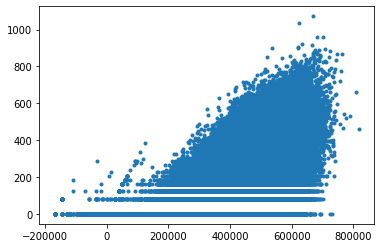

In [4]:
plt.plot(edges.value,edges.n_transactions,'.')

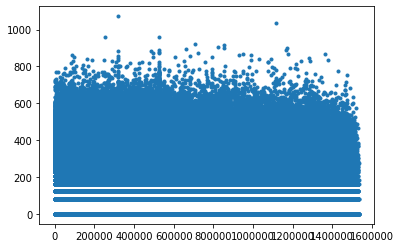

In [5]:
plt.plot(edges.id_1,edges.n_transactions,'.')

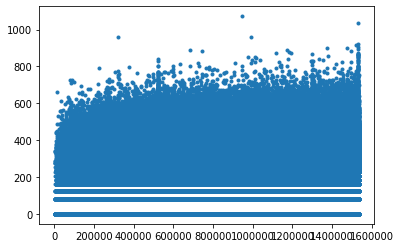

In [6]:
plt.plot(edges.id_2,edges.n_transactions,'.')

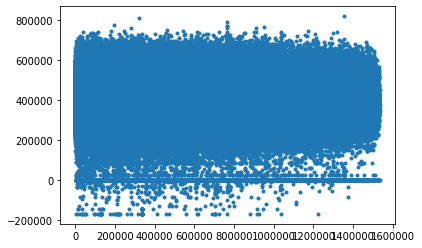

In [11]:
plt.plot(edges.id_1,edges.value,'.')

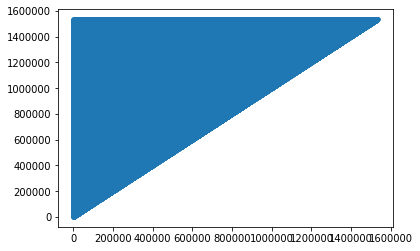

In [12]:
plt.plot(edges.id_1,edges.id_2,'.')

In [14]:
graph = nx.Graph()

In [28]:
ids.values[0][0]

524354

In [29]:
for i in range(len(ids)):
    graph.add_node(ids.values[i][0])

In [30]:
graph.nodes()

NodeView((524354, 61537, 1142564, 300432, 83777, 206473, 58408, 776150, 1292407, 361401, 1301544, 1203323, 1209828, 341670, 83818, 1189202, 1434836, 929264, 1263393, 1342003, 1063763, 41216, 1227912, 983180, 324065, 258315, 1160709, 1443535, 214507, 1319172, 1147550, 785334, 640944, 1154568, 1427428, 409925, 1052575, 258675, 1136487, 722645, 955991, 1408687, 676805, 331678, 1378192, 1289618, 227665, 194554, 1380777, 1297265, 1292275, 1356407, 846476, 567406, 127685, 1392226, 434248, 1452068, 713665, 391589, 1487070, 831789, 800360, 51755, 1500415, 596221, 641486, 1331069, 310694, 732829, 386565, 407136, 319548, 1471693, 1517903, 244691, 598328, 550468, 55389, 966969, 47929, 1439287, 936788, 995150, 1025839, 1202376, 89473, 1523148, 1036225, 457698, 1024638, 811809, 642175, 1392199, 1234038, 912470, 1526265, 52803, 373737, 1244877))

In [35]:
int(edges.values[0][1])

1133997

In [38]:
%%time
for i in range(len(edges)):
    graph.add_edge(int(edges.values[i][0]), int(edges.values[i][1]))

KeyboardInterrupt: 